#Project Brief

For the seasonal data for this project we chose the explore the weather in Sofia, Bulgaria as the climate there has four seasons and it is easy to see the temperature difference between the different seasons. Some information we wanted to find out is the temperature difference between the coldest and warmest days, which month is the coldest and which month has the highest temperature on average.Another thing we could explore is if it slowly gets warmer over the years due to climate changes alothough it may just be a matter of five years. 

This is the source we used to collect the weather data: https://www.timeanddate.com/weather/bulgaria/sofia/historic 

#Seasonal Data set
This project includes:


*   Retrieving and plotting datasets
*   Augmented Dickey-Fuller Test
*   Examining the seasonal autoregressive integrated moving average model, 𝑆𝐴𝑅𝐼𝑀𝐴(𝑝,𝑑,𝑞)(𝑃,𝐷,𝑄)𝑚 
*   Analyzing seasonal patterns in a time series
*   Forecasting using the  𝑆𝐴𝑅𝐼𝑀𝐴(𝑝,𝑑,𝑞)(𝑃,𝐷,𝑄)𝑚  model
*   𝑇𝑟𝑎𝑖𝑛 and  𝑇𝑒𝑠𝑡



Uploading a figures folder along with the Weather forecast.xlsx file needed to make this run










#Code

In [ ]:
#importing necessary tools
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from pandas import read_csv
from typing import Union


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_excel('Weather forecast.xlsx')

print(df)

        Month  Temperature
0  2017-01-01           -6
1  2017-02-01            3
2  2017-03-01            9
3  2017-04-01           11
4  2017-05-01           15
..        ...          ...
68 2022-09-01           16
69 2022-10-01           12
70 2022-11-01            8
71 2022-12-01            4
72 2023-01-01            4

[73 rows x 2 columns]


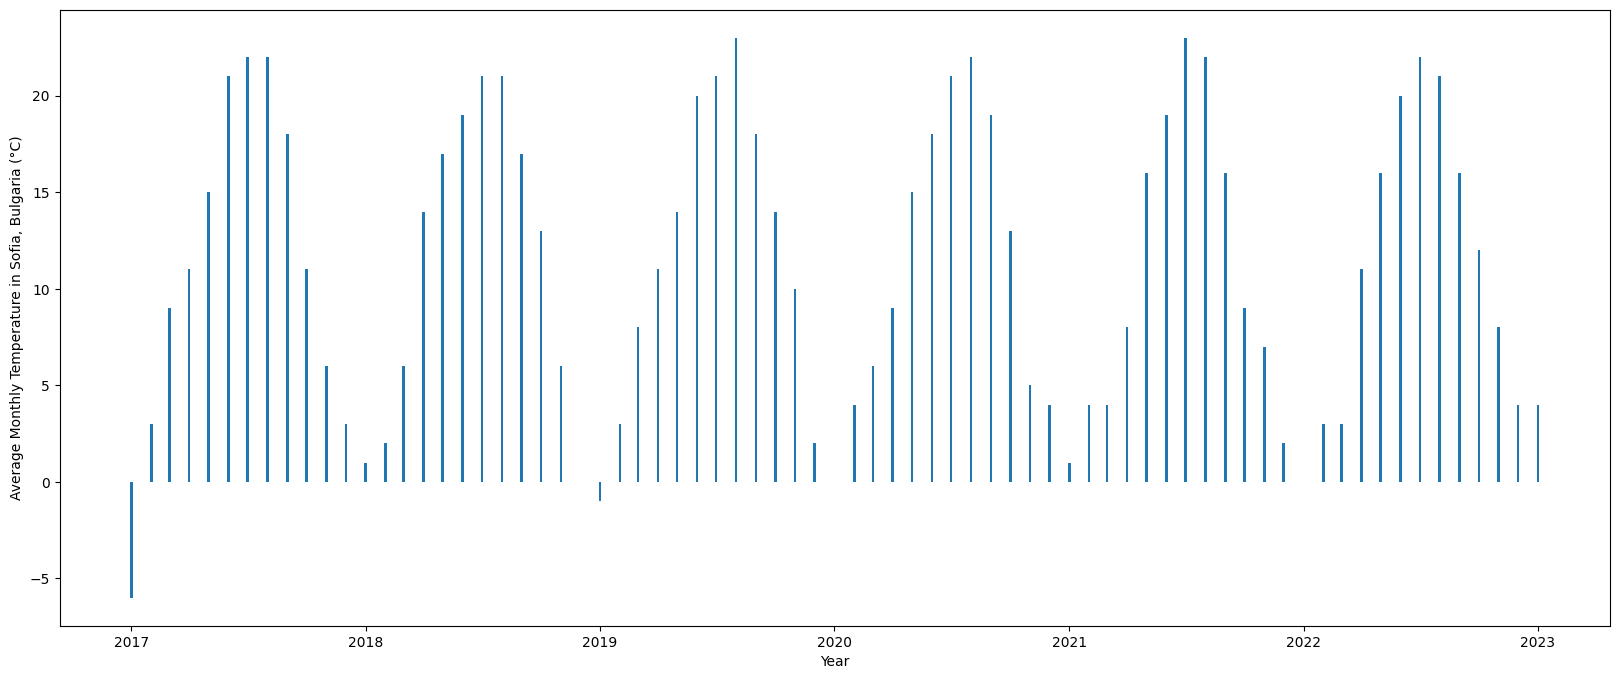

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
#setting Y and X axis along with labels for the graph
x_axis = df['Month']
y_axis = df['Temperature']
plt.bar(x_axis, y_axis, width=4)
plt.xlabel("Year")
plt.ylabel("Average Monthly Temperature in Sofia, Bulgaria (°C)")

plt.show()

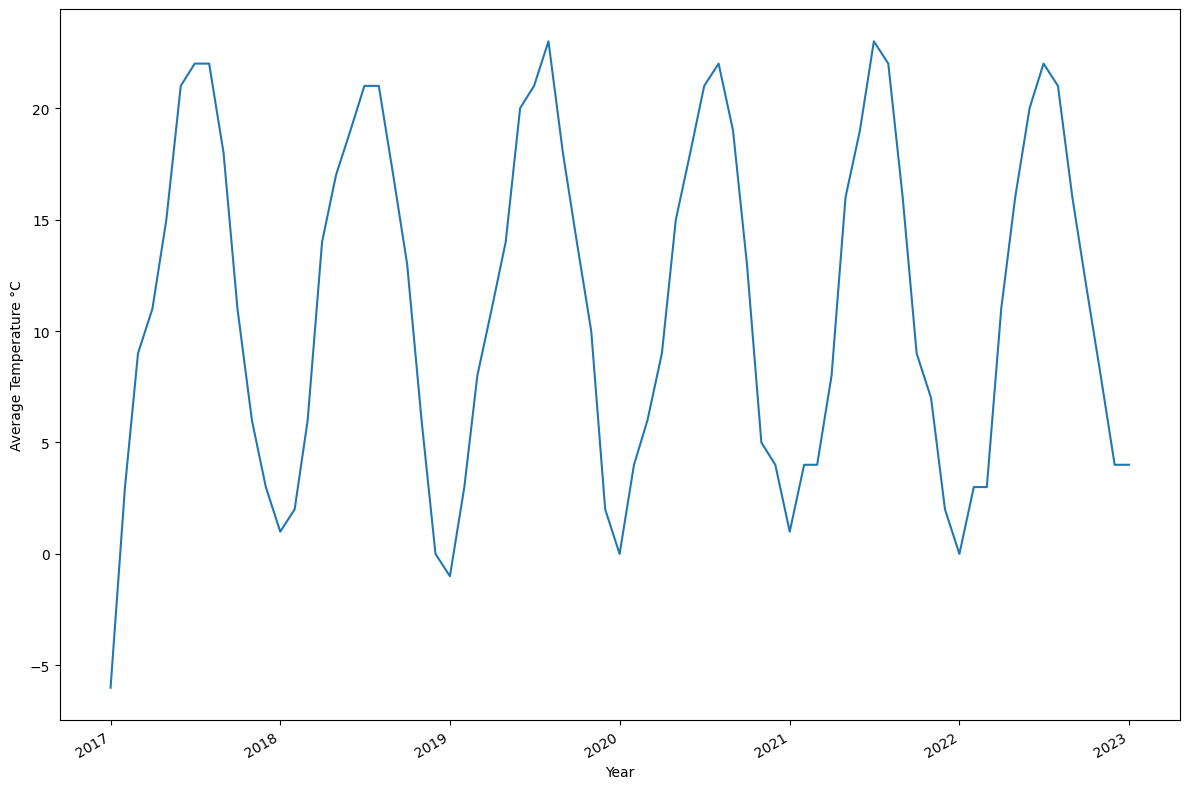

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['Month'],df['Temperature']) 
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature °C')



fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ch08_F02_peixeiro.png', dpi = 300)

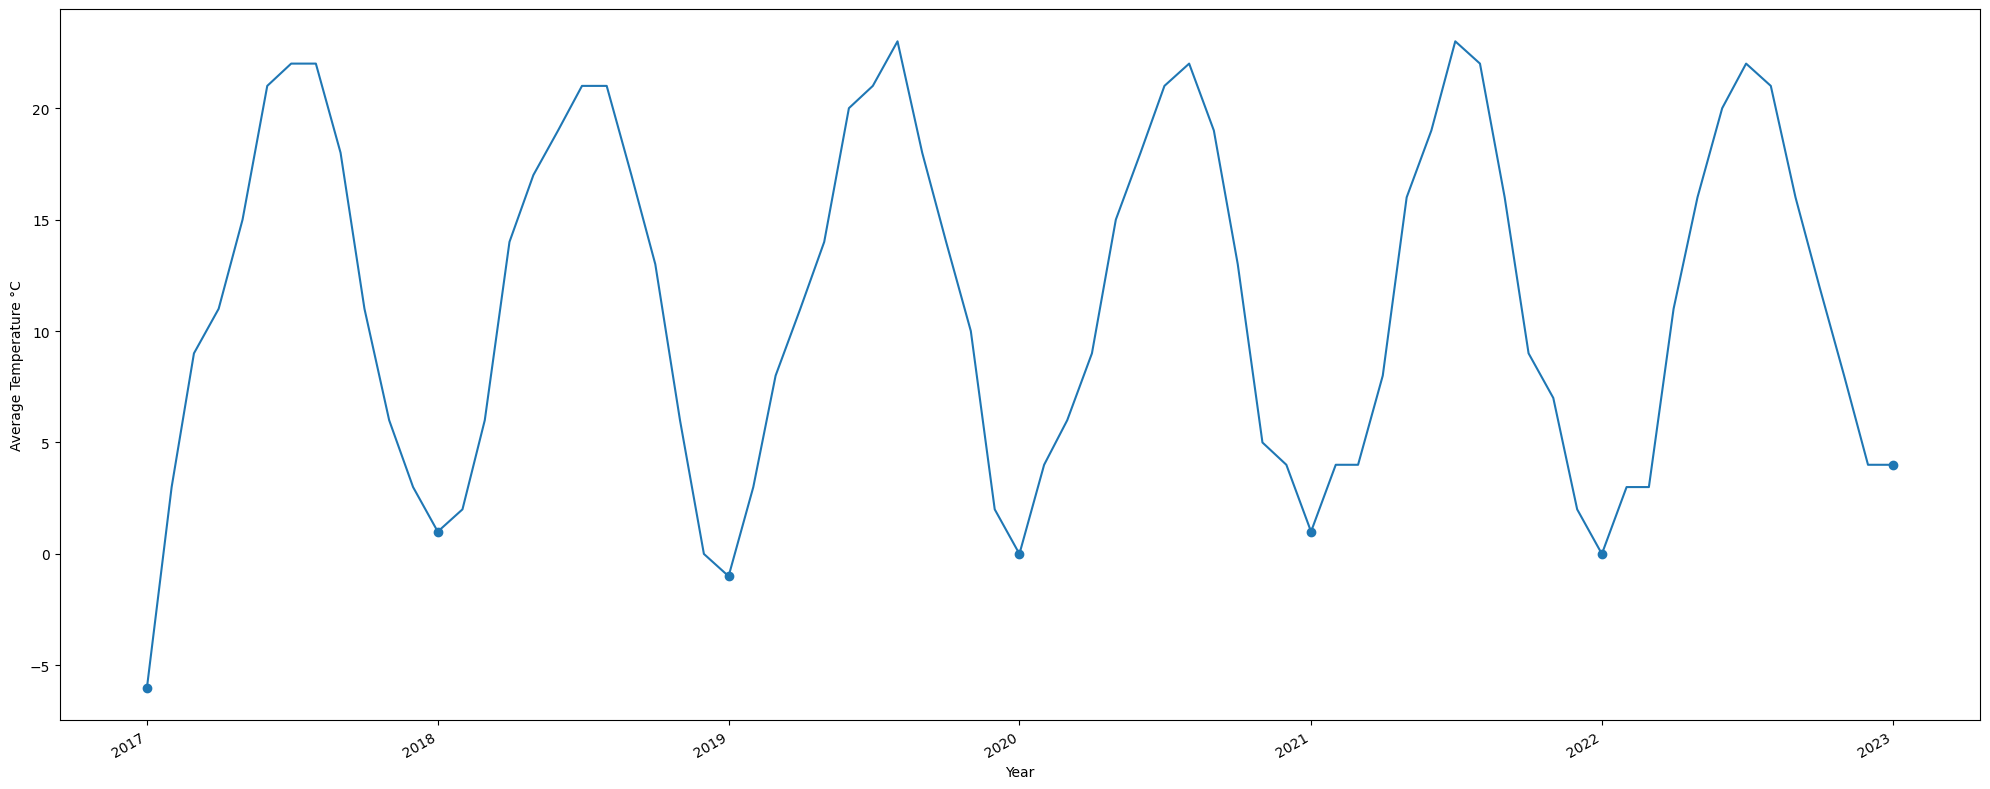

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
#adding markers
ax.plot(df['Month'],df['Temperature'], markevery=np.arange(0, 73, 12), marker='o') 
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature °C')



fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal4_peixeiro.png', dpi=300)

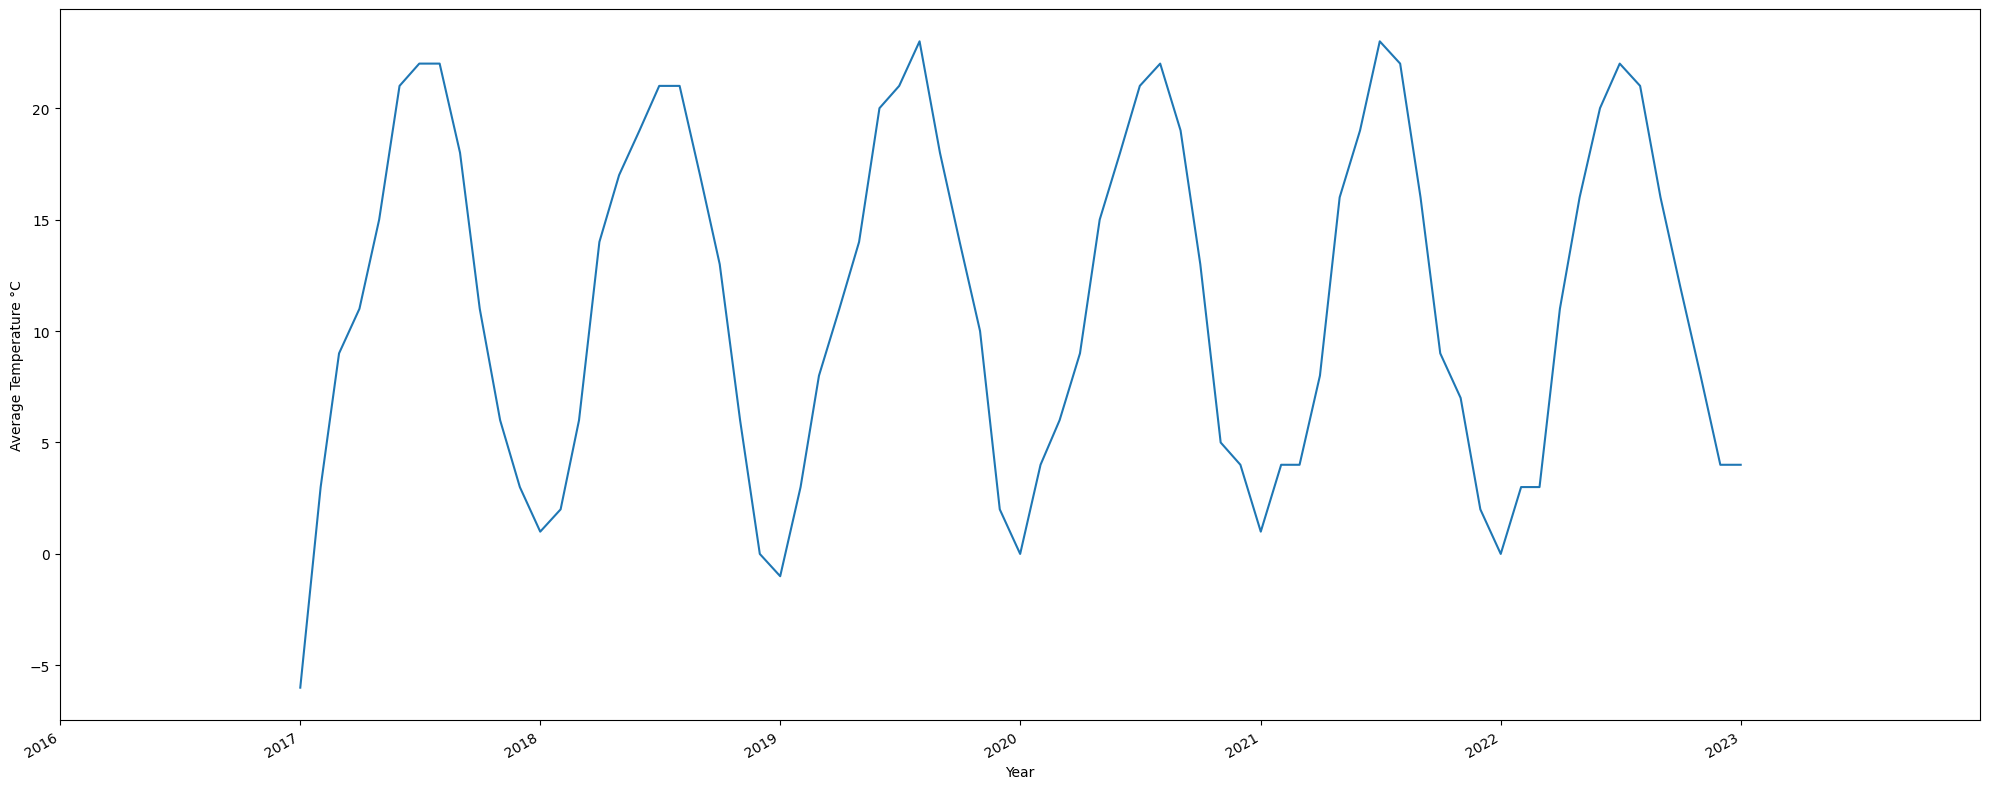

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(df['Month'],df['Temperature']) 

for i in np.arange(0, 73, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature °C')

ax.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2023-12-31'))
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ch08_s5_peixeiro.png', dpi = 300)

In [ ]:
advanced_decomposition = STL(df.Temperature, period=4).fit()

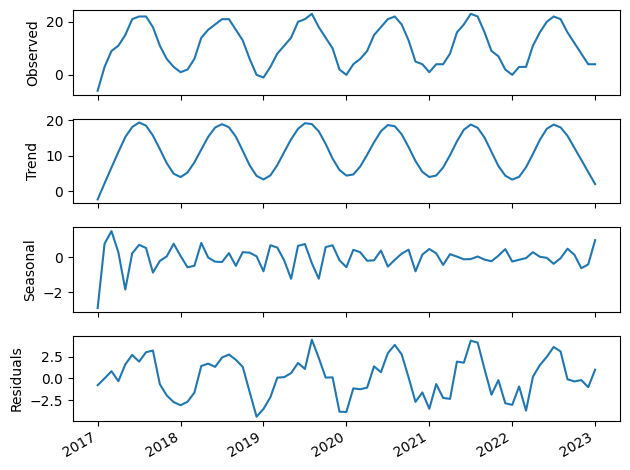

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0,73,12), [2017,2018,2019,2020,2021,2022,2023])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal1_peixeiro.png', dpi=300)

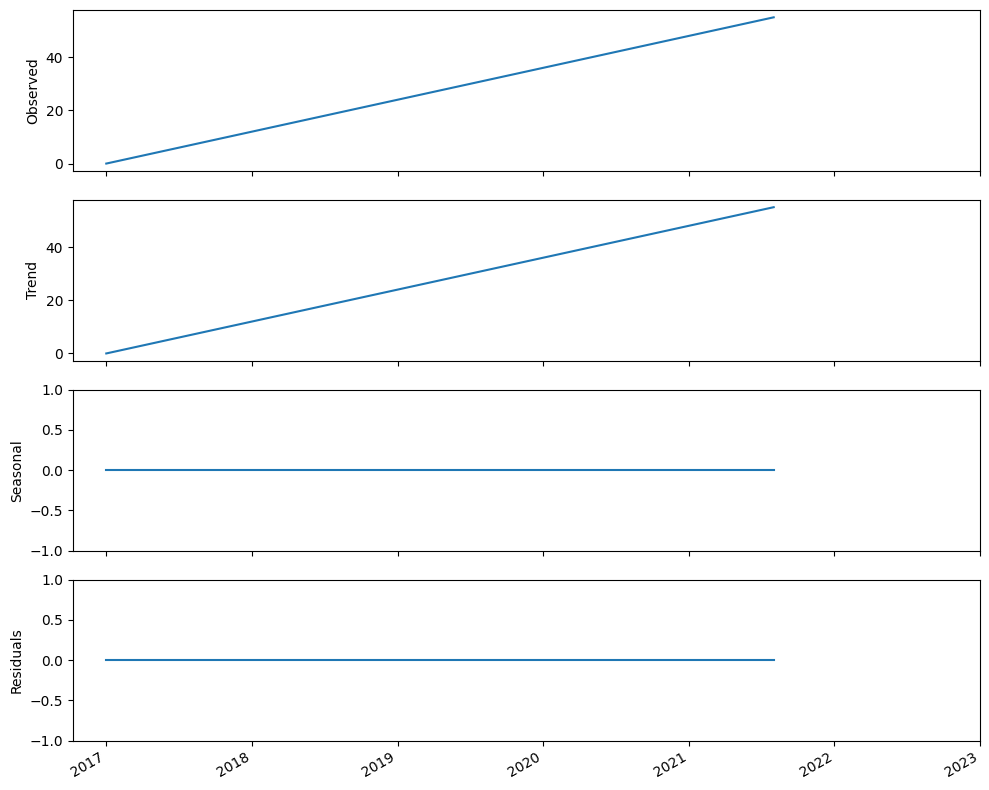

In [ ]:
linear_ts = np.arange(0, 56, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0,73,12), [2017,2018,2019,2020,2021,2022,2023])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F05_peixeiro.png', dpi=300)

In [ ]:
#Augmented Dickey-Fuller Test
df_diff = np.diff(df['Temperature'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.773253621879402
p-value: 2.4879623768837513e-14


In [ ]:
df_diff = np.diff(df['Temperature'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.773253621879402
p-value: 2.4879623768837513e-14


In [ ]:
df_diff = np.diff(df['Temperature'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.773253621879402
p-value: 2.4879623768837513e-14


In [ ]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.654529624677286
p-value: 5.010456506399625e-14


In [ ]:
df_diff2 = np.diff(df_diff, n=1)

ad_fuller_result = adfuller(df_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.64077129675834
p-value: 5.4338271152524774e-14


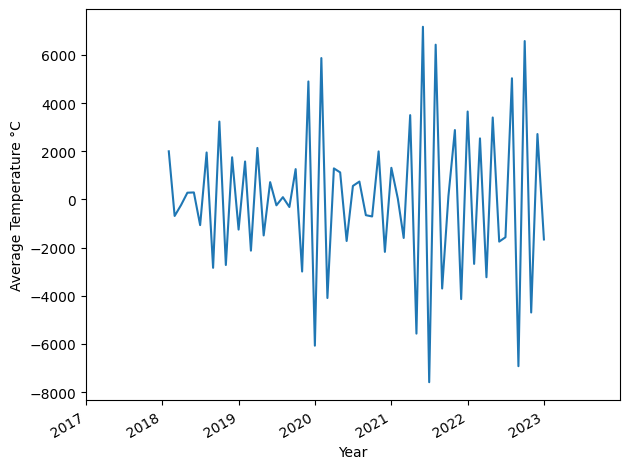

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'][13:],df_diff_seasonal_diff)
ax.set_xlabel('Year')

ax.set_ylabel('Average Temperature °C')


ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2023-12-31'))
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal7_peixeiro.png', dpi=300)

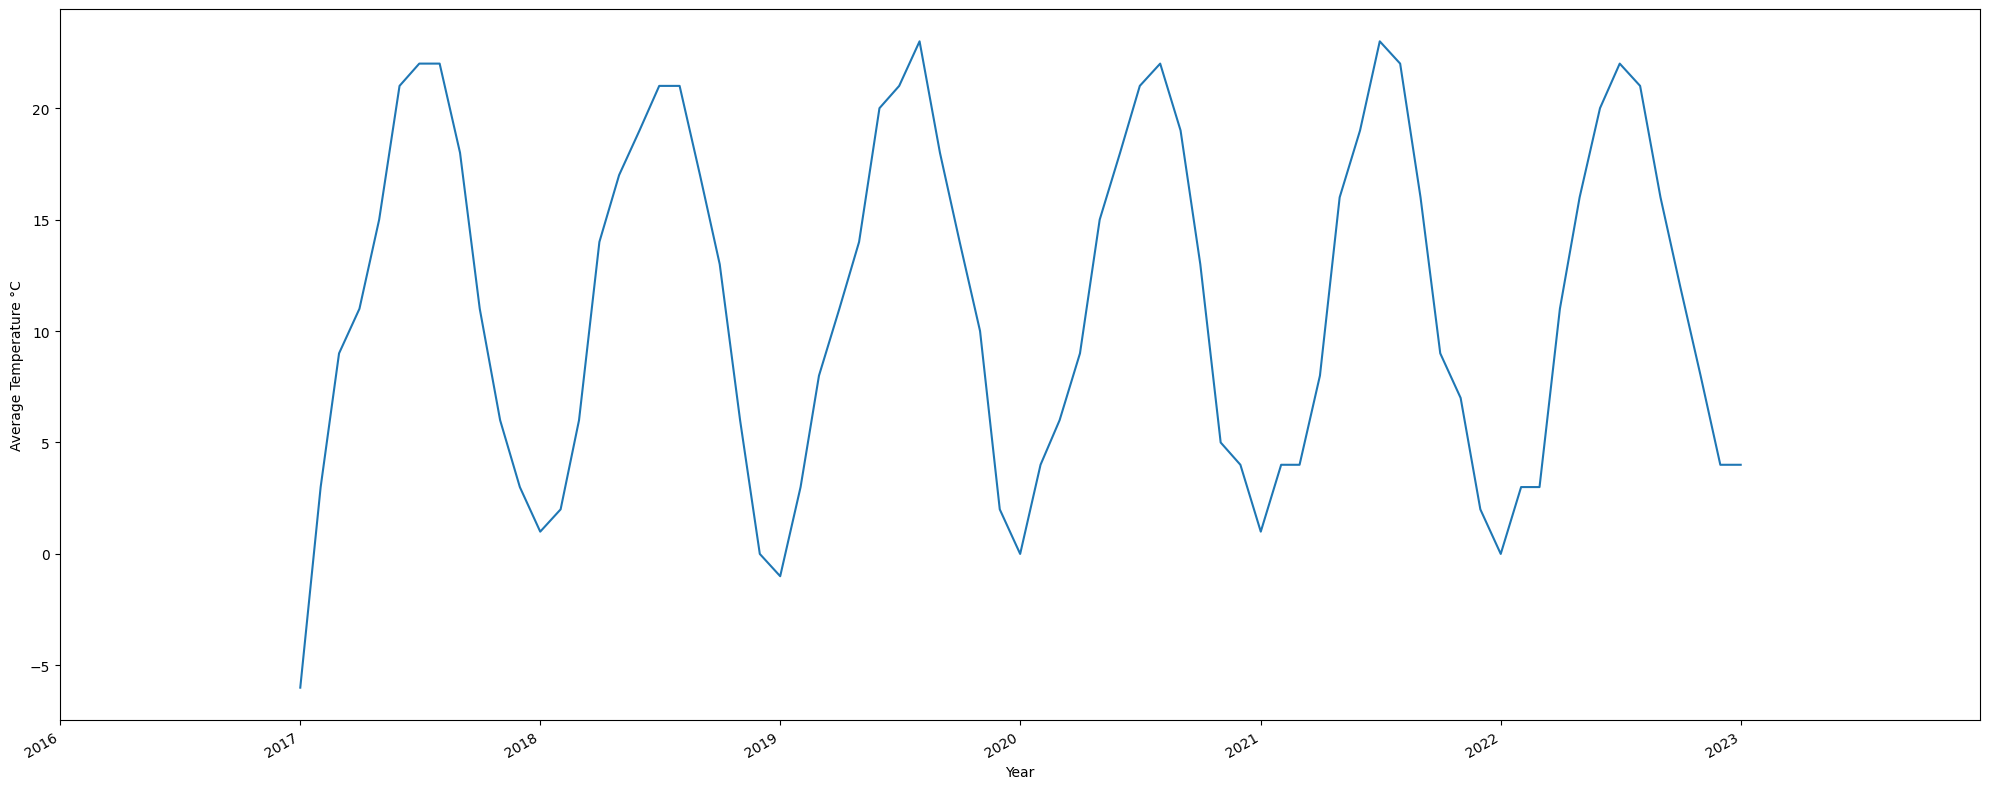

In [ ]:
# Plotting data with train/test split
fig, ax = plt.subplots(figsize=(20, 8))

# Plotting date on x-axis and data on y-axis
ax.plot(df['Month'],df['Temperature'])


# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Average Temperature °C')

# Highlighting the test data in the plot
ax.axvspan(48, 59, color='#808080', alpha=0.2)
# Highlight training data
ax.axvspan(0, 48, color='#e9a296', alpha=0.1)

ax.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2023-12-31'))
# Formatting x-axis labels
fig.autofmt_xdate()

# Adjusting layout
plt.tight_layout()

# Saving the plot to a file
plt.savefig('figures/ca_seasonal2_peixeiro.png', dpi=300)

#Sarima Function

In [ ]:
def optimize_SARIMA(train, order_list, d, D, s) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                train, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Temperature'][:-12]

d = 1
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(1, 2, 0, 1)",211.764498
1,"(0, 3, 0, 1)",211.871113
2,"(2, 1, 0, 1)",212.526365
3,"(1, 2, 1, 0)",212.602788
4,"(0, 2, 0, 1)",212.872331
...,...,...
251,"(1, 0, 2, 3)",233.914836
252,"(0, 0, 3, 3)",235.138869
253,"(1, 0, 3, 3)",235.914824
254,"(1, 0, 0, 0)",239.070866


In [ ]:
SARIMA_model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(1,1,0,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         Temperature   No. Observations:                   61
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -104.847
Date:                             Mon, 08 May 2023   AIC                            215.693
Time:                                     17:50:41   BIC                            221.307
Sample:                                          0   HQIC                           217.815
                                              - 61                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9460      0.154     -6.126      0.000      -1.249      -0.643
ar.S.L12      -0.4571      

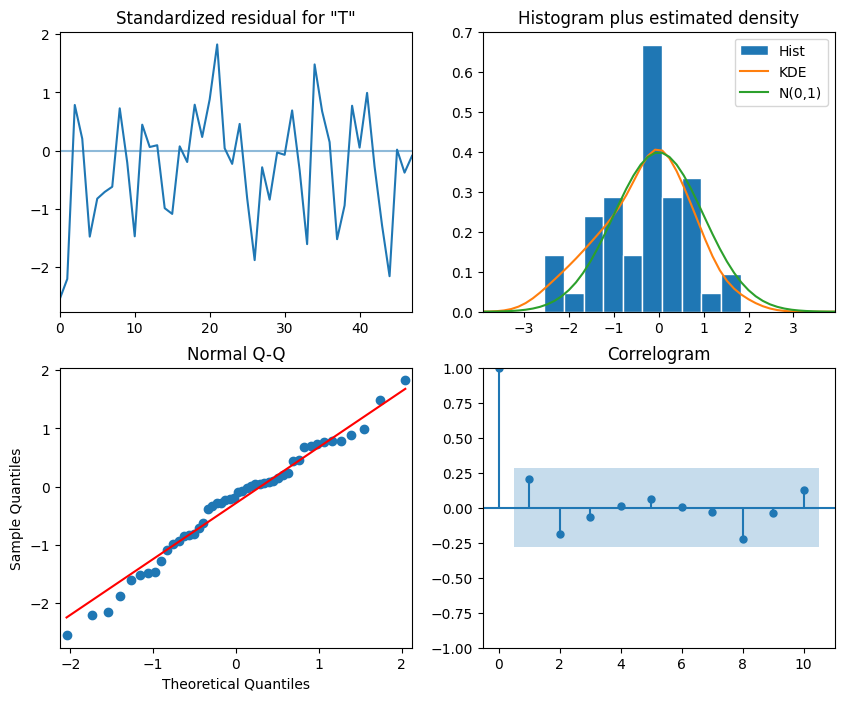

In [ ]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/ca_seasonal9_peixeiro.png', dpi=300)

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = SARIMA_model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,6.494838,0.010819
2,6.587098,0.037122
3,8.063740,0.044713
4,8.856009,0.064801
5,8.982394,0.109768
6,9.977031,0.125623
7,12.895640,0.074692
8,18.280054,0.019222
9,18.930222,0.025793
10,19.111080,0.038874


In [ ]:
residuals = SARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue


In [ ]:
test = df.iloc[-4:]

test['naive_seasonal'] = df['Temperature'].iloc[35:39].values
test

,Month,Temperature,naive_seasonal
69,2022-10-01,12,2
70,2022-11-01,8,0
71,2022-12-01,4,4
72,2023-01-01,4,6


In [ ]:
SARIMA_pred = SARIMA_model_fit.get_prediction(69, 72).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test

,Month,Temperature,naive_seasonal,SARIMA_pred
69,2022-10-01,12,2,10.456111
70,2022-11-01,8,0,5.713306
71,2022-12-01,4,4,2.541843
72,2023-01-01,4,6,0.084708


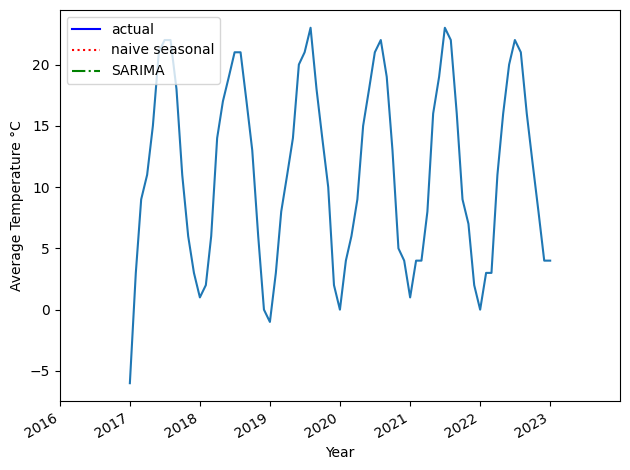

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'],df['Temperature'])
ax.plot(test['Temperature'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA')

ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Average Temperature °C')

ax.axvspan(48, 59, color='#808080', alpha=0.2)

ax.legend(loc=2)


ax.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2023-12-31'))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F13_peixeiro.png', dpi=300)

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_naive_seasonal = mape(test['Temperature'], test['naive_seasonal'])
mape_SARIMA = mape(test['Temperature'], test['SARIMA_pred'])

print(mape_naive_seasonal, mape_SARIMA)

58.333333333333336 43.946411838356426


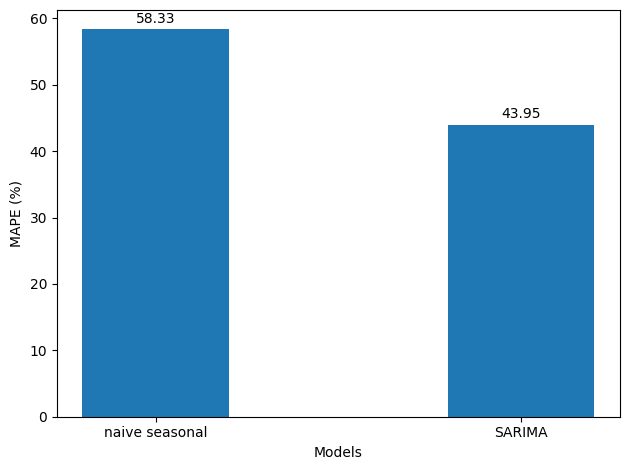

In [ ]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'SARIMA']
y = [mape_naive_seasonal, mape_SARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')


for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH08_F14_peixeiro.png', dpi=300)